In [39]:
!pip install pygame
!pip install --upgrade music21
!pip install keras
!pip install tensorflow

In [40]:
from music21 import converter, instrument, note, chord, stream, midi
import glob
import pickle
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import BatchNormalization as BatchNorm
from keras.callbacks import ModelCheckpoint

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.Score 0x2639f4e3ac0>>

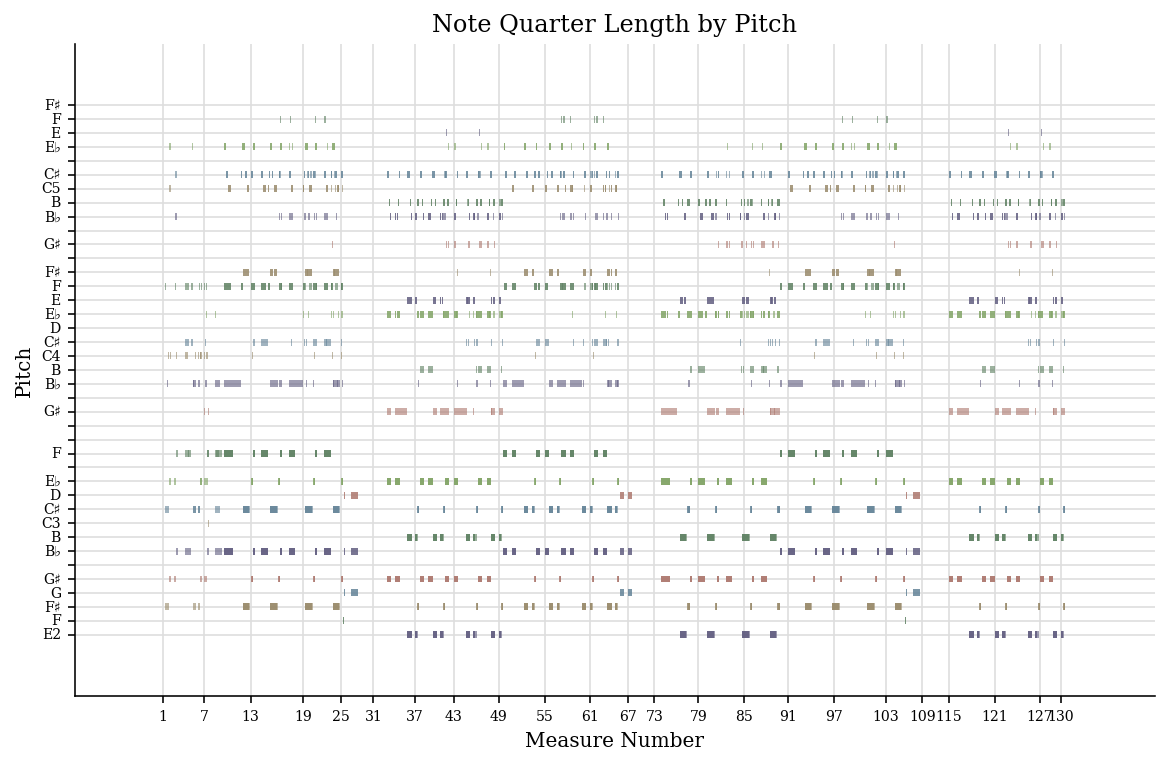

In [41]:
hoge = converter.parse("music/ssg_01.mid")
hoge.plot()

In [42]:
import warnings 
warnings.filterwarnings('ignore')
str_norts = []
for file in glob.glob("music/*.mid"):
      midi = converter.parse(file)
      norts_to_parse = None
      try: 
         s2 = instrument.partitionByInstrument(midi)
         norts_to_parse = s2.parts[0].recurse() 
      except: 
         notrs_to_parse = midi.flat.notes
      for element in norts_to_parse:
            if isinstance(element, note.Note):
                str_norts.append(str(element.pitch))
            elif isinstance(element, chord.Chord):
                str_norts.append('.'.join(str(n) for n in element.normalOrder))
print(str_norts)

['C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'C#3', 'E-3', 'E-3', 'F3', 'F3', 'B-3', 'B-3', 'C#3', 'C#3', 'C#4', 'C#4', 'F3', 'F3', 'C#4', 'C#4', 'C#3', 'C#3', 'B-3', 'B-3', 'F3', 'F3', 'C#4', 'C#4', 'F3', 'F3', 'F4', 'F4', 'F3', 'F3', 'F4', 'F4', 'C#3', 'C#3', 'C#4', 'C#4', 'F3', 'F3', 'E-4', 'E-4', 'C#3', 'C#3', 'C#4', 'C#4', 'F3', 'F3', 'C#4', 'C#4', 'C#3', 'C#3', 'B-3', 'B-3', 'F3', 'F3', 'C#4', 'C#4', 'F3', 'F3', 'F4', 'F4', 'F3', 'F3', 'F4', 'F4', 'C#3', 'C#3', 'C#4', 'C#4', 'F3', 'F3', 'E-4', 'E-4', 'C#3', 'C#3', 'B-3', 'B-3', 'F#3', 'F#3', 'C#4', 'C#4', 'C#3', 'C#3', 'B-3', 'B-3', 'F#3', 'F#3', 'C#4', 'C#4', 'F4', 'F4', 'G#3', 'G#3', 'C#4', 'C#4', 'F#3', 'F#3', 'B-3', 'B-3', 'C#3', 'C#3', 'F#3', 'F#3', 'C#3', 'C#3', 'C#3', 'C#3', 'B-3', 'B-3', 'F#3', 'F#3', 'C#4', 'C#4', 'C#3', 'C#3', 'B-3', 'B

In [43]:
sorted_str_norts = sorted(set(str_norts)) #setは集合を生成する listと同様の操作が可能なのでsortする
num_norts = dict((str_norts, number) for number, str_norts in enumerate(sorted_str_norts)) #内包表記でnortsに紐づくkeyをnumberで辞書型の変数を定義　enumerateの戻り値はリストの番地,値
num_only_norts = []
for r in str_norts:
     num_only_norts.append(num_norts[r])

num_only_norts

[52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 62,
 62,
 73,
 73,
 45,
 45,
 52,
 52,
 53,
 53,
 73,
 73,
 53,
 53,
 52,
 52,
 45,
 45,
 73,
 73,
 53,
 53,
 73,
 73,
 74,
 74,
 73,
 73,
 74,
 74,
 52,
 52,
 53,
 53,
 73,
 73,
 63,
 63,
 52,
 52,
 53,
 53,
 73,
 73,
 53,
 53,
 52,
 52,
 45,
 45,
 73,
 73,
 53,
 53,
 73,
 73,
 74,
 74,
 73,
 73,
 74,
 74,
 52,
 52,
 53,
 53,
 73,
 73,
 63,
 63,
 52,
 52,
 45,
 45,
 69,
 69,
 53,
 53,
 52,
 52,
 45,
 45,
 69,
 69,
 53,
 53,
 74,
 74,
 77,
 77,
 53,
 53,
 69,
 69,
 45,
 45,
 52,
 52,
 69,
 69,
 52,
 52,
 52,
 52,
 45,
 45,
 69,
 69,
 53,
 53,
 52,
 52,
 45,
 45,
 69,
 69,
 53,
 53,
 74,
 74,
 77,
 77,
 53,
 53,
 69,
 69,
 45,
 45,
 52,
 52,
 69,
 69,
 52,
 52,
 25,
 25,
 53,
 53,
 25,
 25,
 53,
 53,
 25,
 25,
 53,
 53,
 25,
 25,
 53,
 53,
 30,
 30,
 63,
 63,
 30,
 30,
 63,
 63,
 30,
 30,
 63,
 63,
 30,
 30,
 70,
 70,


In [44]:
sequence_length = 100
network_input = []
network_output = []
for i in range(0, len(num_only_norts) - sequence_length, 1):
    network_input.append(num_only_norts[i:i + sequence_length])
    network_output.append(num_only_norts[i + sequence_length])
network_input = np.reshape(network_input, (-1, sequence_length, 1))

In [45]:
network_input.shape, network_input

((11261, 100, 1),
 array([[[52],
         [52],
         [52],
         ...,
         [52],
         [53],
         [53]],
 
        [[52],
         [52],
         [52],
         ...,
         [53],
         [53],
         [73]],
 
        [[52],
         [52],
         [52],
         ...,
         [53],
         [73],
         [73]],
 
        ...,
 
        [[73],
         [53],
         [45],
         ...,
         [ 6],
         [ 8],
         [ 8]],
 
        [[53],
         [45],
         [56],
         ...,
         [ 8],
         [ 8],
         [ 8]],
 
        [[45],
         [56],
         [53],
         ...,
         [ 8],
         [ 8],
         [ 0]]]))

In [46]:
network_output = np_utils.to_categorical(network_output)
network_output.shape, network_output

((11261, 84),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [47]:
n_vocab = len(sorted_str_norts)

model = Sequential()
model.add(LSTM(
        256,
        input_shape=(network_input.shape[1], network_input.shape[2]),
        return_sequences=True
    ))
model.add(LSTM(512, return_sequences=True, recurrent_dropout=0.3,))
model.add(LSTM(512))
model.add(BatchNorm())
model.add(Dropout(0.3))
model.add(Dense(256))
model.add(Activation('relu'))

model.add(BatchNorm())
model.add(Dropout(0.3))
model.add(Dense(n_vocab))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')


model.summary()

In [48]:
filepath = 'weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=0, save_best_only=True,mode='min')
callbacks_list = [checkpoint]   
model.fit(network_input, network_output, epochs=1, batch_size=128, callbacks=callbacks_list)

88/88 [==============================] - 2561s 29s/step - loss: 0.3042


In [77]:
start = np.random.randint(0, len(network_input)-1)
pattern = network_input[start]
prediction_output = []

In [78]:
for index in range(500):
    prediction_input = np.reshape(pattern, (1,len(pattern),1))
    prediction_input = prediction_input / float(n_vocab)
    prediction = model.predict(prediction_input, verbose=0)
    index = np.argmax(prediction)
    result = num_only_norts[index]
    prediction_output.append(result)
    pattern = np.append(pattern, index)
    pattern = pattern[1:len(pattern)]

In [79]:
offset = 0
output_notes = []
str_prediction_output = []

for i in range(500):
    try:
       str_prediction_output.append(sorted_str_norts[prediction_output[i]])
    except KeyError:
        print("KeyError Exception.")
# create note and chord objects based on the values generated by the model
for pattern in str_prediction_output:
    # pattern is a chord
    if ('.' in pattern) or pattern.isdigit():
        notes_in_chord = pattern.split('.')
        notes = []
        for current_note in notes_in_chord:
            new_note = note.Note(int(current_note))
            new_note.storedInstrument = instrument.Piano()
            notes.append(new_note)
        new_chord = chord.Chord(notes)
        new_chord.offset = offset
        output_notes.append(new_chord)
    else:
        new_note = note.Note(pattern)
        new_note.offset = offset
        new_note.storedInstrument = instrument.Piano()
        output_notes.append(new_note)
    
    offset += 0.5

In [80]:
output_notes

[<music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note B->,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note B->,
 <music21.note.Note C#>,
 <music21.note.Note C#>,
 <music21.note.Note C#>,


In [81]:
midi_stream = stream.Stream(output_notes)
midi_stream.write('midi', fp='test_output.mid')

'test_output.mid'